In [51]:
# !pip3 install "dask[complete]"
# !pip3 install plotly

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import matplotlib
import matplotlib.dates as mdates
import sklearn
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [52]:
train_df = pd.read_csv("MLFinalProjectDataset/train_data.csv")
train_df.head(5)

,displayId,timestamp,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,publisher,widgetId,device,os,browser,source,docId,userId,clicked
0,4706262,1578429005696,4,0,290,7855,6,10,6262,0,0,0,11,3543873,2688642,1
1,4706262,1578429005696,4,0,1386,7967,15,10,6262,0,0,0,11,3543873,2688642,0
2,4706262,1578429005696,4,0,378,1160,3610,10,6262,0,0,0,11,3543873,2688642,0
3,4706267,1578429007726,4,0,6642,804,3475,14,607,1,3,0,15,6245475,2688641,1
4,4706267,1578429007726,4,0,8414,6155,5271,14,607,1,3,0,15,6245475,2688641,0


In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768416 entries, 0 to 3768415
Data columns (total 16 columns):
 #   Column        Dtype
---  ------        -----
 0   displayId     int64
 1   timestamp     int64
 2   dayOfWeek     int64
 3   hourOfDay     int64
 4   advertiserId  int64
 5   campaignId    int64
 6   creativeId    int64
 7   publisher     int64
 8   widgetId      int64
 9   device        int64
 10  os            int64
 11  browser       int64
 12  source        int64
 13  docId         int64
 14  userId        int64
 15  clicked       int64
dtypes: int64(16)
memory usage: 460.0 MB


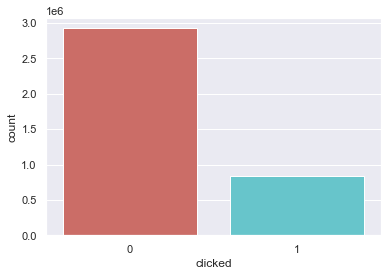

0    0.776516
1    0.223484
Name: clicked, dtype: float64

In [54]:
sns.countplot(x='clicked', data=train_df, palette='hls')
plt.show();
train_df['clicked'].value_counts()/len(train_df)

<div dir="rtl">
    همانطور که انتظار می‌رود داده‌ها نامتوازن هستند. حدود ۷۸ درصد داده‌ها لیبل صفر و ۲۲ درصد لیبل ۱ دارند.
</div>

<div>
    <h1>Exploratory Data Analysis and Feature Engineering </h1>
    </div>
    
<div dir="rtl">
    
    در این بخش به دنبال بررسی هر یک از ویژگی‌ها و همچنین روابط بین آنها و متغیر هدف است. هدف در اینجا به دست آوردن شهود نسبت به داده‌ها با هر روش ممکن (آمار یا نمودار) است. سعی می‌کنیم از اطلاعات این بخش برای انتخاب بهترین ویژگی استفاده کنیم.
</div>

<div dir="rtl">
    ابتدا بررسی می‌کنیم که آیا ویژگی‌ای وجود دارد که مقادیر آن یونیک باشد. در این صورت، هیچ اطلاعات مفیدی ارائه نمی‌دهد، زیرا هیچ دو نمونه از طریق آن قابل مقایسه نیست.
</div>

In [55]:
for col in train_df.columns:
    if train_df.shape[0] == train_df[col].unique().shape[0]:
        print(col)

<div dir="rtl">
    تعداد مقادیر null 
    را برای هر ستون محاسبه می‌کنیم:
</div>

In [56]:
count = train_df.isna().sum()
missing_value_df = pd.DataFrame({'column': train_df.columns,
                                 'missing count' : count})
missing_value_df.set_index('column', inplace=True)
missing_value_df

,missing count
column,
displayId,0
timestamp,0
dayOfWeek,0
hourOfDay,0
advertiserId,0
campaignId,0
creativeId,0
publisher,0
widgetId,0


<div dir="rtl">
    بیشتر ویژگی‌های مجموعه داده کته‌گوریکال و بیشتر ویژگی‌های کته‌گوریکال دارای مقادیر زیادی هستند. این باعث می شود تا 
    EDA
    شهود زیادی ندهد. اما ما تلاش خود را می‌کنیم :)
</div>

<div>
    <h2>
        <li/>
        timestamp
    </h2>
</div>

In [57]:
train_df.timestamp.describe()

count    3.768416e+06
mean     1.579005e+12
std      3.571385e+08
min      1.578429e+12
25%      1.578715e+12
50%      1.578971e+12
75%      1.579330e+12
max      1.579639e+12
Name: timestamp, dtype: float64

In [58]:
len(train_df.timestamp.unique())

773941

In [59]:
# train_df['timestamp'] = pd.to_datetime(train_df.timestamp)

<div dir="rtl">
    این ویژگی مقادیر زیادی را دارد، بنابراین بررسی آن کمک خاصی نمی‌کند. سعی کردیم عدد را به شکل
    datatime
    در بیاوریم تا اطلاعات مفید‌تری از آن استخراج کنیم که تاریخ نامفهومی شد.
</div>

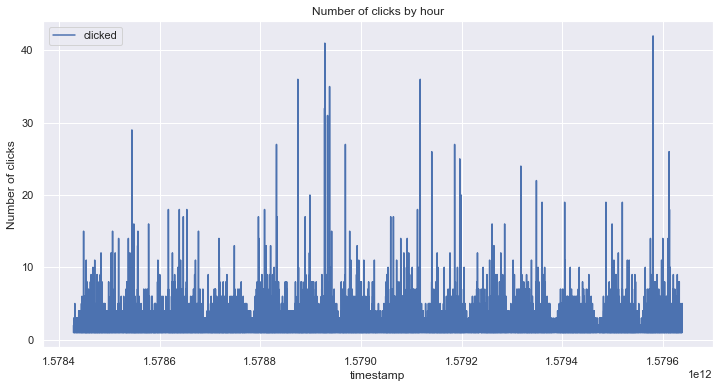

In [60]:
train_df.groupby('timestamp').agg({'clicked':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

<div>
    <h2>
        <li>hourOfDay
        </li>
    </h2>
</div>
    

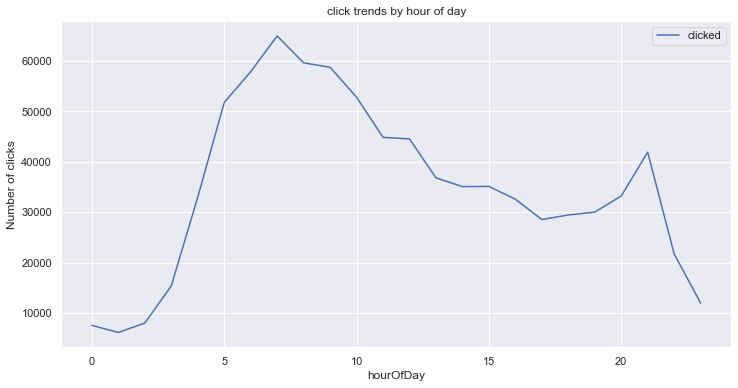

In [61]:
train_df.groupby('hourOfDay').agg({'clicked':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');

<div dir="rtl"> 
    به طور کلی، بیشترین تعداد کلیک در ساعت 7  و کمترین تعداد کلیک در ساعت 0 است. به نظر می رسد
    <b>
    ساعت روز یک ویژگی مفید برای تخمین تقریبی است.
        </b>
</div>
<p></p>

<div dir="rtl"> 
    حال اگر تعداد نمایش‌ها را نیز در نظر بگیریم: 
</div>

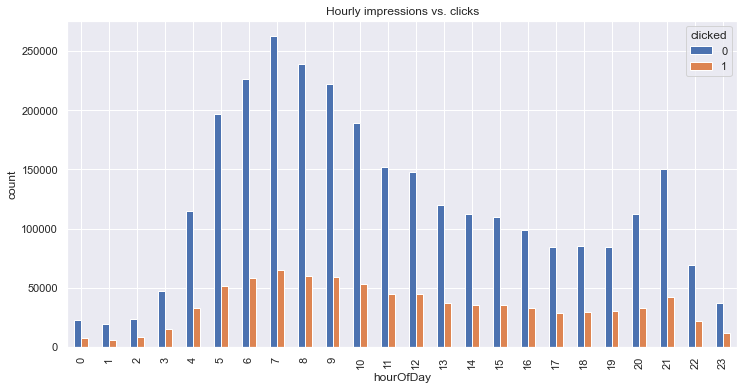

In [62]:
train_df.groupby(['hourOfDay', 'clicked']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');


<div dir="rtl"> 
    می‌بینیم که تعداد کلیک با تعداد نمایش‌ها در هر ساعت متناسب است.
    
</div>
<p></p>
<div  dir="rtl">
     با داشتن تعداد کلیک‌ها و نمایش‌ها، نرخ کلیک
    (CTR)
   در ساعت را محاسبه کنیم. 
</div>
    

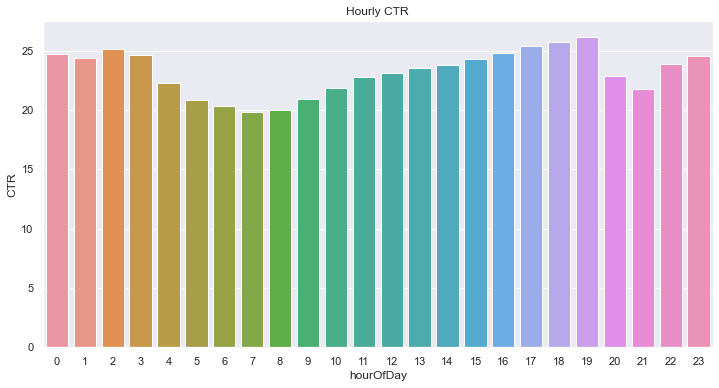

In [63]:
df_click = train_df[train_df['clicked'] == 1]
df_hour = train_df[['hourOfDay','clicked']].groupby(['hourOfDay']).count().reset_index()
df_hour = df_hour.rename(columns={'clicked': 'impressions'})
df_hour['clicks'] = df_click[['hourOfDay','clicked']].groupby(['hourOfDay']).count().reset_index()['clicked']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hourOfDay', data=df_hour)
plt.title('Hourly CTR');

<div dir="rtl"> 
یکی از مشاهدات جالب در اینجا این است که بالاترین
CTR 
در ساعات 0 ، 2 ، 19 و 23 اتفاق افتاده است. در دو قسمت قبل دیدم که در ساعات 0 و 23 کمترین تعداد کلیک و نمایش را داشتیم.
    در واقع تقعر و تحدب منحنی 
    CTR
    دقیقا عکس منحنی تعداد کلیک و تعداد نمایش است. 
    
</div>

<div>
    <h2>
        <li/>
        dayOfWeek
    </h2>
</div>

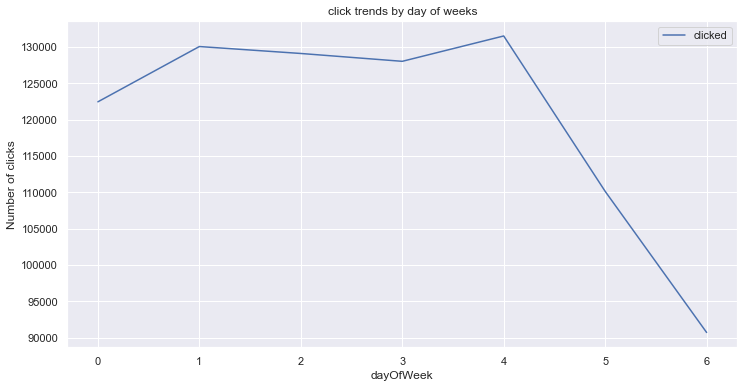

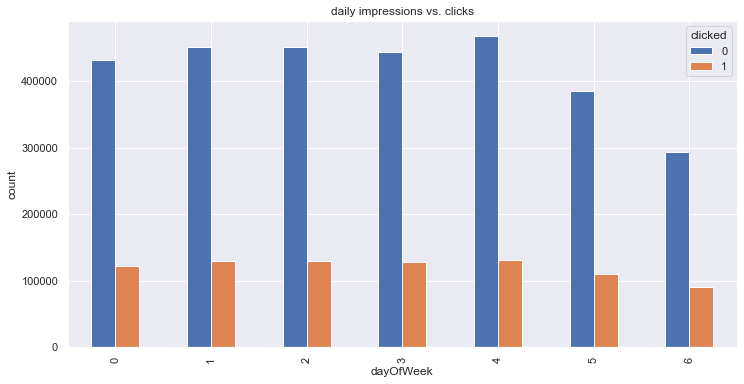

In [64]:
train_df.groupby('dayOfWeek').agg({'clicked':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by day of weeks');
plt.show()

train_df.groupby(['dayOfWeek', 'clicked']).size().unstack().plot(kind='bar', title="day of week", figsize=(12,6))
plt.ylabel('count')
plt.title('daily impressions vs. clicks');

<div dir="rtl">
روز ۴ بیشترین تعداد نمایش و کلیک را دارد، سپس روز ۱ و پس از آن روز ۲ و ۳. روز ۰ و ۵ و ۶ کمترین تعداد نمایش و کلیک را دارند. (اینکه دقیقا کدام روز است بستگی دارد روز صفر را کدام روز هفته بگیریم).
</div>
<p></p>
<div  dir="rtl">
     حال نرخ کلیک
    (CTR)
   روزانه را محاسبه کنیم. 
</div>

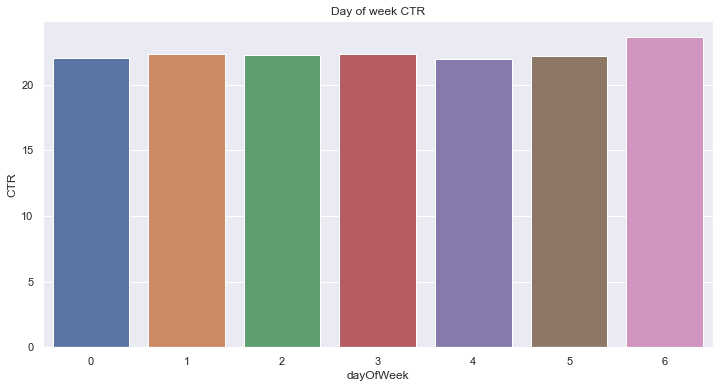

In [65]:
df_click = train_df[train_df['clicked'] == 1]
df_dayofweek = train_df[['dayOfWeek','clicked']].groupby(['dayOfWeek']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'clicked': 'impressions'})
df_dayofweek['clicks'] = df_click[['dayOfWeek','clicked']].groupby(['dayOfWeek']).count().reset_index()['clicked']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='dayOfWeek', data=df_dayofweek)
plt.title('Day of week CTR');

<div dir="rtl">
    تفاوت چندانی بین روز‌های ۰ تا ۵ وجود ندارد. روز ۶ بیشترین میزان 
    CTR
    را دارد.
</div>

<div>
    <h2>
        <li/>
        widgetId
    </h2>
</div>

In [66]:
print(train_df.widgetId.value_counts()/len(train_df))

7759     5.956216e-02
3637     2.815984e-02
13728    2.729263e-02
6679     2.549612e-02
11571    2.546110e-02
             ...     
11581    5.307270e-07
5423     5.307270e-07
6027     5.307270e-07
1315     5.307270e-07
5945     5.307270e-07
Name: widgetId, Length: 1165, dtype: float64


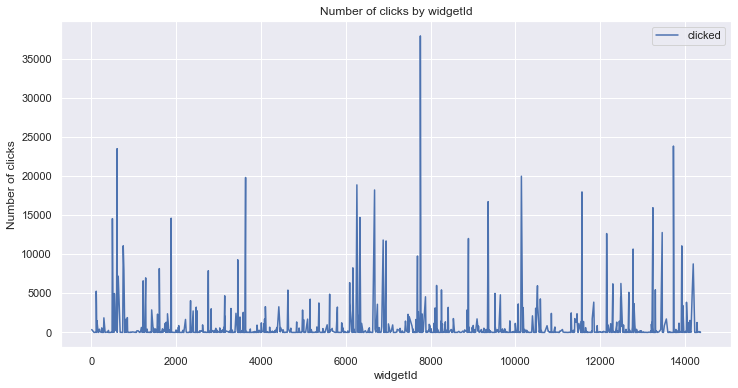

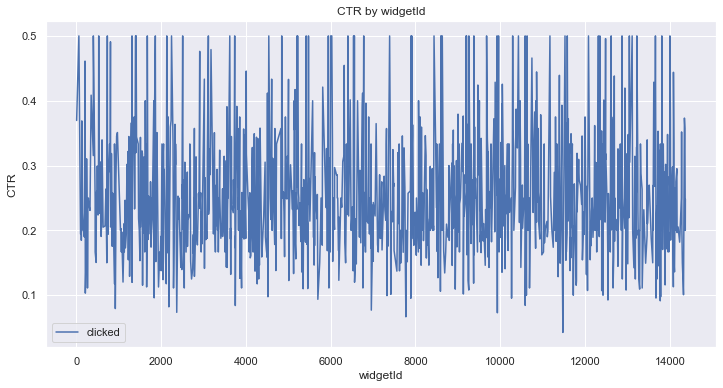

In [67]:
train_df.groupby('widgetId').agg({'clicked':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by widgetId');

train_df.groupby('widgetId').agg({'clicked':'mean'}).plot(figsize=(12,6))
plt.ylabel('CTR')
plt.title('CTR by widgetId');

<div dir="rtl">
   مقادیر زیادی دارد. بررسی آن شهودی نمی‌دهد.
    به دلیل مشابه سایر ویژگی‌هایی که مقادیر زیادی
    دارند را بررسی نمی‌کنیم.
</div>

<div>
    <h2>
        <li/>
        device
    </h2>
</div>

In [68]:
device_click = train_df.groupby('device').agg({'clicked':'sum'}).reset_index()
device_impression = train_df.groupby('device').agg({'clicked':'count'}).reset_index().rename(columns={'clicked': 'impressions'})
merged_device = pd.merge(left = device_click , right = device_impression, how = 'inner', on = 'device')
merged_device['CTR'] = merged_device['clicked'] / merged_device['impressions']*100
merged_device

,device,clicked,impressions,CTR
0,0,603859,2497121,24.182208
1,1,235517,1258407,18.715487
2,2,2677,12340,21.693679
3,3,128,548,23.357664


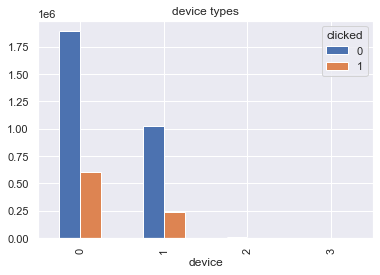

In [69]:
train_df[['device','clicked']].groupby(['device','clicked']).size().unstack().plot(kind='bar', title='device types');


<div dir="rtl">
دستگاه نوع 0 بیشترین تعداد نمایش و کلیک را دارد و بعد از آن دستگاه نوع 1 است. 
    همچنین مقدار CTR
    برای دستگاه نوع 0 بیشترین است.
</div>

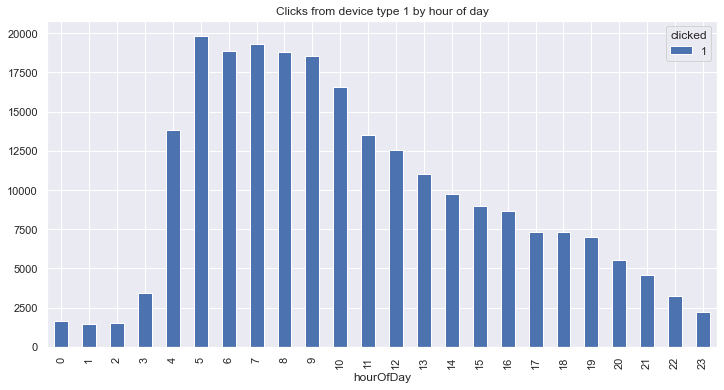

In [70]:
df_click[df_click['device']==1].groupby(['hourOfDay', 'clicked']).size().unstack().plot(kind='bar', title="Clicks from device type 1 by hour of day", figsize=(12,6));

<div dir="rtl">
همانطور که انتظار می‌رفت ، بیشترین کلیک ها در ساعات کاری از نوع دستگاه 1 اتفاق افتاده است. 
    <b>
    نوع دستگاه قطعاً یک ویژگی مهم است.
    </b>
    </div>

<div>
    <h2>
        <li/>OS
    </h2>
</div>

In [71]:
os_click = train_df.groupby('os').agg({'clicked':'sum'}).reset_index()
os_impression = train_df.groupby('os').agg({'clicked':'count'}).reset_index().rename(columns={'clicked': 'impressions'})
merged_os = pd.merge(left = os_click , right = os_impression, how = 'inner', on = 'os')
merged_os['CTR'] = merged_os['clicked'] / merged_os['impressions']*100
merged_os

,os,clicked,impressions,CTR
0,0,576904,2379375,24.246031
1,1,228420,1220720,18.711908
2,2,29617,130030,22.777051
3,3,4299,22654,18.976781
4,4,904,4839,18.681546
5,5,1894,10194,18.579557
6,6,143,604,23.675497


<div dir="rtl">
دستگاه نوع 0 بیشترین تعداد نمایش و کلیک را دارد و بعد از آن دستگاه نوع 1 است. همچنین CTR
     در دستگاه نوع ۱ بیشترین است. تعداد نمایش و کلیک برای سایر انواع دستگاه  به نسبت ناچیز است. 
</div>

<div>
    <h2>
        <li/> Correlation HeatMap
    </h2>
</div>

<AxesSubplot:>

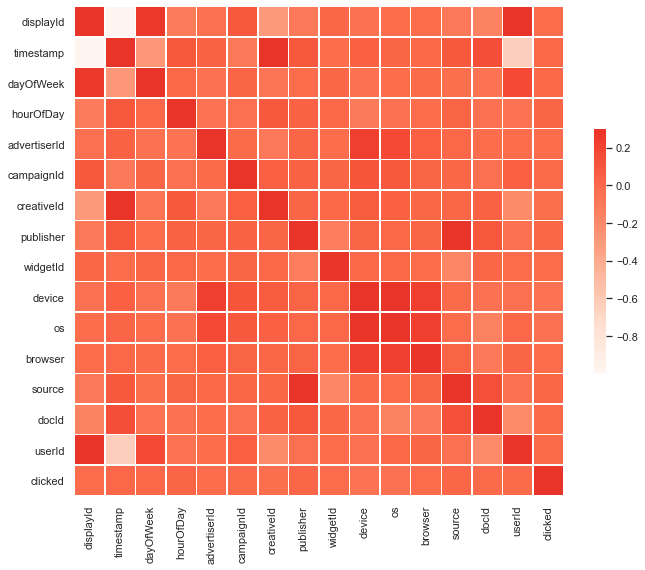

In [72]:
# Compute the correlation matrix
corr = train_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='Reds', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [73]:
from sklearn.feature_selection import mutual_info_classif as MI
mutual_information = MI(train_df[train_df.columns[train_df.columns != 'clicked']],
                        train_df['clicked'], discrete_features = True)